## What is Bootstrapping?

In [1]:
import numpy as np
X = np.array([[1., 0.], [2., 1.], [0., 0.], [3., 5.], [7., 9.], [22., 19.], [94., 97.]])

In [2]:
!pwd

/Users/Paul/Desktop/General_Assembly/DSI_SM_01/curriculum/week-06/2.3-lesson


In [3]:
X

array([[  1.,   0.],
       [  2.,   1.],
       [  0.,   0.],
       [  3.,   5.],
       [  7.,   9.],
       [ 22.,  19.],
       [ 94.,  97.]])

In [4]:
from sklearn.utils import resample
resample(X)

array([[  7.,   9.],
       [  3.,   5.],
       [ 22.,  19.],
       [ 22.,  19.],
       [ 22.,  19.],
       [ 94.,  97.],
       [ 94.,  97.]])

In [5]:
from sklearn.utils import shuffle
shuffle(X)

array([[ 94.,  97.],
       [ 22.,  19.],
       [  0.,   0.],
       [  3.,   5.],
       [  2.,   1.],
       [  1.,   0.],
       [  7.,   9.]])

In [6]:
shuffle(X, n_samples=3)

array([[ 1.,  0.],
       [ 2.,  1.],
       [ 7.,  9.]])

## What is Bootstrap Aggregating (aka Bagging)?

In [20]:
import pandas as pd
df = pd.read_csv('./assets/datasets/car.csv')
df.head()

buying  maint doors persons lug_boot safety acceptability
0  vhigh  vhigh     2       2    small    low         unacc
1  vhigh  vhigh     2       2    small    med         unacc
2  vhigh  vhigh     2       2    small   high         unacc
3  vhigh  vhigh     2       2      med    low         unacc
4  vhigh  vhigh     2       2      med    med         unacc

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = [c for c in df.columns if c != 'acceptability']
for c in df.columns:
    df[c] = le.fit_transform(df[c])

X = df[features]
y = df['acceptability']

In [9]:
X

buying  maint  doors  persons  lug_boot  safety
0          3      3      0        0         2       1
1          3      3      0        0         2       2
2          3      3      0        0         2       0
3          3      3      0        0         1       1
4          3      3      0        0         1       2
5          3      3      0        0         1       0
6          3      3      0        0         0       1
7          3      3      0        0         0       2
8          3      3      0        0         0       0
9          3      3      0        1         2       1
10         3      3      0        1         2       2
11         3      3      0        1         2       0
12         3      3      0        1         1       1
13         3      3      0        1         1       2
14         3      3      0        1         1       0
15         3      3      0        1         0       1
16         3      3      0        1         0       2
17         3      3      0        1         0       0
18         3      3      0        2         2       1
19         3      3      0        2         2       2
20         3      3      0        2         2       0
21         3      3      0        2         1       1
22         3      3      0        2         1       2
23         3      3      0        2         1       0
24         3      3      0        2         0       1
25         3      3      0        2         0       2
26         3      3      0        2         0       0
27         3      3      1        0         2       1
28         3      3      1        0         2       2
29         3      3      1        0         2       0
...      ...    ...    ...      ...       ...     ...
1698       1      1      2        2         0       1
1699       1      1      2        2         0       2
1700       1      1      2        2         0       0
1701       1      1      3        0         2       1
1702       1      1      3        0         2       2
1703       1      1      3        0         2       0
1704       1      1      3        0         1       1
1705       1      1      3        0         1       2
1706       1      1      3        0         1       0
1707       1      1      3        0         0       1
1708       1      1      3        0         0       2
1709       1      1      3        0         0       0
1710       1      1      3        1         2       1
1711       1      1      3        1         2       2
1712       1      1      3        1         2       0
1713       1      1      3        1         1       1
1714       1      1      3        1         1       2
1715       1      1      3        1         1       0
1716       1      1      3        1         0       1
1717       1      1      3        1         0       2
1718       1      1      3        1         0       0
1719       1      1      3        2         2       1
1720       1      1      3        2         2       2
1721       1      1      3        2         2       0
1722       1      1      3        2         1       1
1723       1      1      3        2         1       2
1724       1      1      3        2         1       0
1725       1      1      3        2         0       1
1726       1      1      3        2         0       2
1727       1      1      3        2         0       0

[1728 rows x 6 columns]

In [10]:
y

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
       ..
1698    2
1699    1
1700    3
1701    2
1702    2
1703    2
1704    2
1705    2
1706    2
1707    2
1708    2
1709    2
1710    2
1711    0
1712    1
1713    2
1714    1
1715    3
1716    2
1717    1
1718    3
1719    2
1720    0
1721    1
1722    2
1723    1
1724    3
1725    2
1726    1
1727    3
Name: acceptability, dtype: int64

In [22]:
df.acceptability.values

array([2, 2, 2, ..., 2, 1, 3])

In [24]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
bagging = BaggingClassifier(knn, max_samples=0.5, max_features=0.5)

print "KNN Score:\t", cross_val_score(knn, X, y, cv=5, n_jobs=-1).mean()
print "Bagging Score:\t", cross_val_score(bagging, X, y, cv=5, n_jobs=-1).mean()

KNN Score:	0.643070305149
Bagging Score:	0.728605995429


### Example from "An Introduction to Statistical Learning", James, Witten, Hastie, and Tibshirani

see http://www-bcf.usc.edu/~gareth/ISL/

In [25]:
boston_df = pd.read_csv('Boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [26]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

In [27]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [28]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [29]:
# Pruning not supported. Choosing max depth 3)
regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

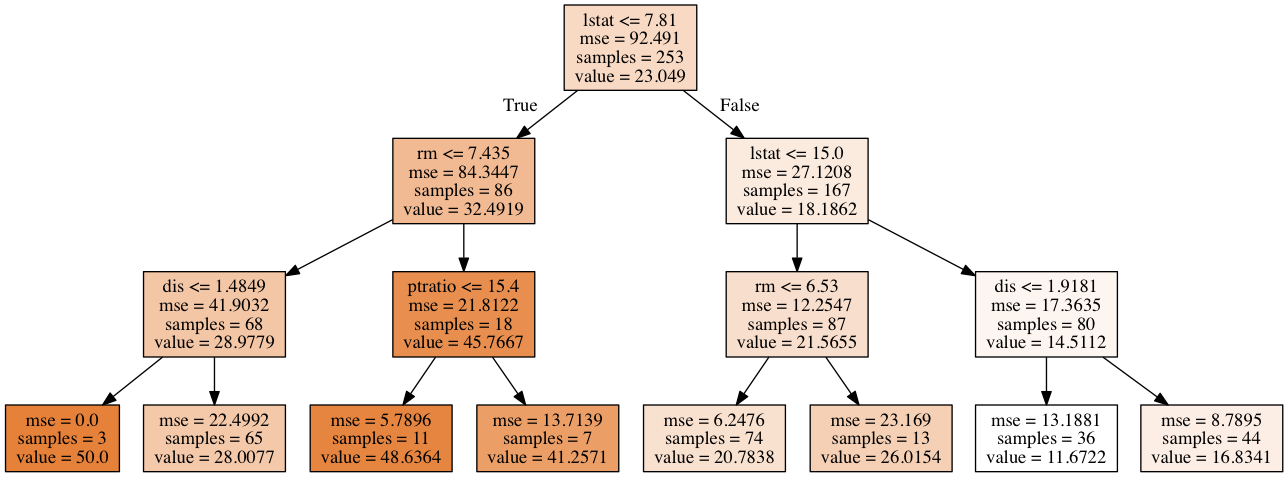

In [31]:
graph = print_tree(regr2, features=X.columns)
Image(graph.create_png())

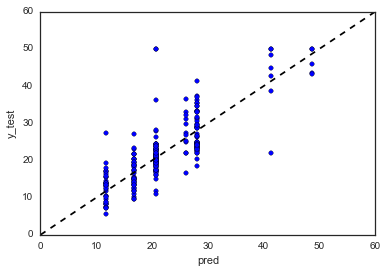

In [23]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [24]:
mean_squared_error(y_test, pred)

26.023230850097448

In [25]:
X.shape

(506, 13)

## Bagging and Random Forests

In [26]:
# Bagging: using all features

######### USING THE MAX NUMBER OF FEATURES IN RANDOMFORREST IS BAGGING!!!


regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

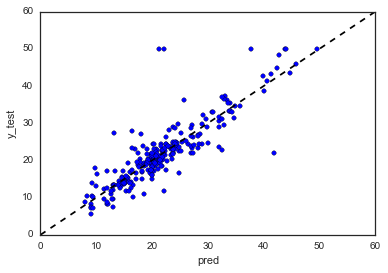

In [27]:
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [28]:
mean_squared_error(y_test, pred)

18.301366007905138

In [29]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [30]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

16.469374703557314

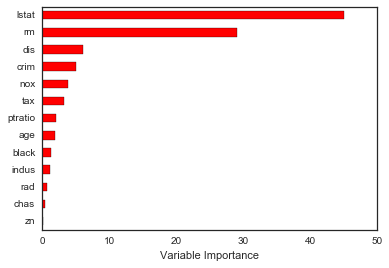

In [31]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## Bagging and Gridsearch CodeAlong

In [33]:
datapath = 'sf_crime_mini_cats.csv'
sf = pd.read_csv(datapath)
print sf.crime.value_counts()

stolen_property                250
weapon_laws                    250
burglary                       250
suspicious_occ                 250
larceny_theft                  250
drug_narcotic                  250
sex_offenses_forcible          250
vandalism                      250
kidnapping                     250
missing_person                 250
forgery_counterfeiting         250
robbery                        250
arson                          250
vehicle_theft                  250
driving_under_the_influence    250
disorderly_conduct             250
warrants                       250
drunkenness                    250
fraud                          250
loitering                      250
prostitution                   250
assault                        250
trespass                       250
Name: crime, dtype: int64


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
multi_lr = LogisticRegression()

X = sf[[x for x in sf.columns if x not in['crime','crime_category']]]
X = (X - X.mean()) / X.std()
X_col_names = X.columns
X = X.values

Y = sf['crime_category']

scores = cross_val_score(multi_lr, X, Y, cv=5)
print scores
print np.mean(scores)

[ 0.10695652  0.10521739  0.10869565  0.12434783  0.11913043]
0.112869565217


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [38]:
from sklearn.grid_search import GridSearchCV

params = {
    'n_estimators':[50,100,250,500],
    'max_samples':[0.25, 0.5, 0.75, 1.0],
    'max_features':[0.25, 0.5, 0.75, 1.0]
}



In [ ]:
dtc = DecisionTreeClassifier(max_depth=None)

bag = BaggingClassifier(dtc)

gs = GridSearchCV(bag, params, cv=5, verbose=1, n_jobs=-1)

gs.fit(X, Y)

print gs.best_params_
print gs.best_score_

best_bag = gs.best_estimator_

#bag_scores = cross_val_score(bag, X, Y, cv=5)

#print bag_scores
#print np.mean(bag_scores)